In [1]:
# 상관관계
# 상관관계는 변수 간의 상호 관련성을 의미하며, 관계성의 정도는 통계적 또는 시각적인 방법으로 파악 가능

In [2]:
# 산점도 ( Scatter Plot )
# : 산점도를 이용하면 상관관계를 쉽게 파악 가능
# : 두 연속형 데이터의 관게 파악에 용이
# : 특정 관계를 갖고 있는 데이터는 한 눈에 파악 가능
# : 극단치 혹은 이상치 파악 가능
# : 한 변수의 값이 증가할 때, 다른 변수의 값도 같이 증가한다면두 변수는 양의 상관관계 
# : 한 변수는 증가하고 다른 변수는 감소한다면, 두 변수는 음의 상관관계

In [4]:
# 상관계수 
# 두 변수 간의 함께 변화하는 경향을 객관적으로 측정할 수 있는 척도
# 피어슨 상관계수 
# : 선형관계의 강도를 측정

# 스피어맨 상관계수 
# : 비선형 순위 상관관계를 측정
# - 1과 1 사이에서 일어남

In [5]:
# 피어슨 상관계수 
# 두 변수 간 선형관계의 정도를 객관적으로 측정할 수 있는 방법

In [6]:
# 비선형 상관계수
# : 변수 간 관계가 선형적이지 않다면 비선형 상관계수 또는 데이터 변환을 고려
# : 스피어맨 상관계수 
# : 스피어맨은 정규분포가 아니어도 monotonic(단조) 증가 / 하락에 관한 비선형관계 포함 가능

In [7]:
# 상관분석
# : 측정된 두 변수 간의 선형관계가 있는지 탐색 및 확인하는 분석 방법
# 귀무가설 : 선형관계 없음
# 대립가설 : 선형관계 있음  

In [8]:
# 상관분석 Process
# Data 특성 파악 & 가설 설정 
# : 종속 변수 / 독립변수 : 모두 '등비' 여야 함
# 귀무가설 : 변수 간 선형관계 X
# 대립가설 : 변수 간 선형관계 O

# 산점도를 이용한 시각화 및 가정 검토 
# : 선형관계가 아니면 분석의 의미를 찾기 힘듦
# : 변수별 정규성, 등분산성 체크

# 목적에 맞는 분석 수행 
# : Step 1 ~ 2 결과를 토대로 최종 분석 방법 선택

# 결과 해석 및 최종 결론 도출
# : P값 기반 상관관계 변수 선택 
# : 관계의 정도 확인

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # 시각화 툴
import seaborn as sns # 시각화 툴 

from scipy import stats # 피어슨, 스피어맨 상관계수


In [10]:
# MLB 

In [11]:
# 출루율이 높으면 타율이 높다. 

In [12]:
# 비선형 순위 상관

In [42]:
import numpy as np
import pandas as pd


# 실습활용을 위한 sklearn 패키지 내 보스턴 주#택가격 데이터 로딩
# sklearn 상위 버전 ( 1.2 이상 ) 에서 데이터 셋을 더이상 제공하지 않음

# import warnings
# from sklearn.datasets import load_boston
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore")
#     data = load_boston()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df2 = pd.read_csv(data_url, sep="\s+")
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2,2]
housing = pd.merge(pd.DataFrame(data), pd.DataFrame(target), left_index = True, right_index = True, how = 'inner')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data = housing.copy()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
type(housing_data)

pandas.core.frame.DataFrame

In [15]:
housing_data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [23]:
raw_df.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [19]:
display(housing_data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
boston_df = housing_data.copy()
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


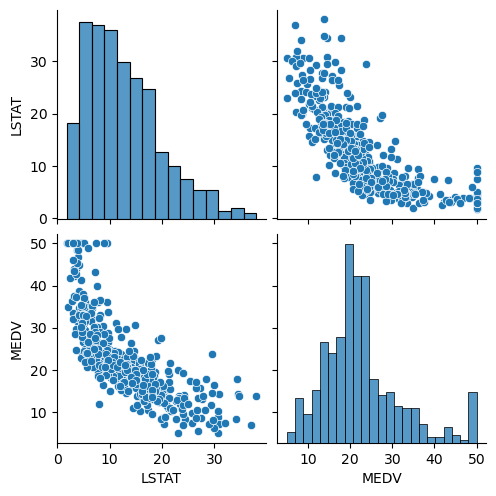

In [47]:
# pairplot을 통한 단변량, 다변량 관계 확인
sns.pairplot(boston_df[['LSTAT', 'MEDV']])
plt.show()

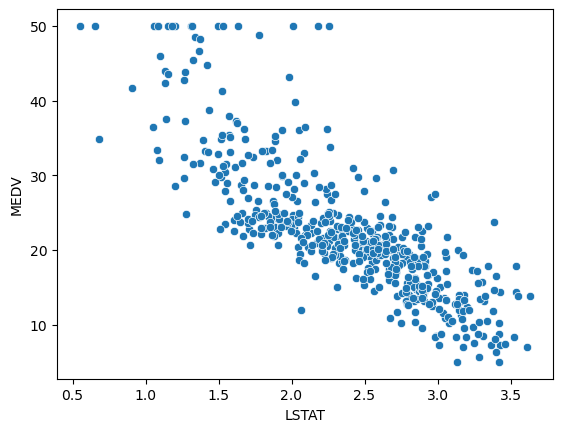

In [48]:
# 로그 변환으로 선형화 후 산점도 확인
sns.scatterplot(x=np.log(boston_df['LSTAT']), y=boston_df['MEDV'])
plt.show()

In [32]:
display(boston_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.605430
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2.212660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.393766
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.078410
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,2.269028
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,2.206074
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.729884
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.868721


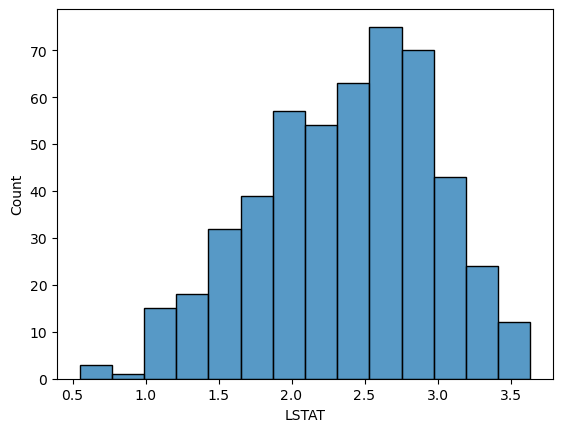

In [51]:
sns.histplot(np.log(boston_df['LSTAT']))
plt.show()

In [49]:
stats.shapiro(np.log(boston_df['LSTAT']))

ShapiroResult(statistic=0.9861650466918945, pvalue=9.793916979106143e-05)

In [56]:
 # scipy spearmanr 함수 이용
spearman = stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])

In [57]:
# spearman = stats.spaermanr(boston_df['LSTAT'], boston_df['MEDV'])
print('스피어맨 상관계수 : {:.4f}'.format(spearman[0]))
print('유의확률(p-value) : {:.4f}'.format(spearman[1]))

스피어맨 상관계수 : -0.8529
유의확률(p-value) : 0.0000


In [58]:
# 정규성 가정을 충족하진 못하지만, 결과 비교를 위해 상관분석 진행
pearson = stats.pearsonr(boston_df['LSTAT'],boston_df['MEDV'])
print('피어슨 상관계수 : {:.4f}'.format(pearson[0]))
print('유의확률(p-value) : {:.4f}'.format(pearson[1]))

피어슨 상관계수 : -0.7377
유의확률(p-value) : 0.0000


In [59]:
print('피어슨 상관계수 : {:.4f}'.format(spearman[0]))
print('스피어맨 상관계수 :{:.4f} '.format(pearson[0]))

피어슨 상관계수 : -0.8529
스피어맨 상관계수 :-0.7377 
